In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

Importing and Exploring The Data

In [2]:
df_movies = pd.read_csv('rotten_tomatoes_movies.csv')
df_movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [3]:
df_movies.shape

(17712, 22)

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

Null Values

In [5]:
df_movies.isnull().sum().sort_values(ascending=False)

critics_consensus                   8578
authors                             1542
original_release_date               1166
production_company                   499
audience_status                      448
streaming_release_date               384
actors                               352
movie_info                           321
runtime                              314
audience_count                       297
audience_rating                      296
directors                            194
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
genres                                19
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
rotten_tomatoes_link                   0
movie_title                            0
content_rating                         0
tomatometer_rotten_critics_count       0
dtype: int64

In [6]:
df_movies.drop('critics_consensus', axis=1, inplace=True)

In [7]:
df_movies.dropna(inplace=True, axis=0)

In [8]:
df_movies.shape

(14437, 21)

In [9]:
#No Duplicated Data
df_movies.duplicated().sum()

0

Exploratory Data Analysis

In [10]:
df_movies.select_dtypes('object').nunique()

rotten_tomatoes_link      14437
movie_title               14002
movie_info                14436
content_rating                6
genres                      990
directors                  7093
authors                   11612
actors                    14435
original_release_date      5337
streaming_release_date     2066
production_company         2431
tomatometer_status            3
audience_status               2
dtype: int64

In [11]:
#Number of directors in each movie
df_movies['num_directors'] = df_movies['directors'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of directors
df_movies[df_movies["num_directors"] == df_movies["num_directors"].max()]

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors
11626,m/paris_je_taime,Paris Je T'aime,A collection has 18 vignettes set in Paris. In...,R,"Art House & International, Drama, Romance","Christoffer Boe, Olivier Assayas, Frédéric Aub...","Bruno Podalydès, Paul Mayeda Berges, Gurinder ...","Juliette Binoche, Steve Buscemi, Sergio Castel...",2007-05-04,2016-09-27,...,Certified-Fresh,87.0,112.0,Upright,84.0,192592.0,36,97,15,22


In [12]:
#Number of authors in each movie
df_movies['num_authors'] = df_movies['authors'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of authors
df_movies[df_movies["num_authors"] == df_movies["num_authors"].max()]

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors,num_authors
11626,m/paris_je_taime,Paris Je T'aime,A collection has 18 vignettes set in Paris. In...,R,"Art House & International, Drama, Romance","Christoffer Boe, Olivier Assayas, Frédéric Aub...","Bruno Podalydès, Paul Mayeda Berges, Gurinder ...","Juliette Binoche, Steve Buscemi, Sergio Castel...",2007-05-04,2016-09-27,...,87.0,112.0,Upright,84.0,192592.0,36,97,15,22,24


In [13]:
#Number of actors in each movie
df_movies['num_actors'] = df_movies['actors'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of actors
df_movies[df_movies["num_actors"] == df_movies["num_actors"].max()]

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors,num_authors,num_actors
939,m/1042135-malcolm_x,Malcolm X,A tribute to the controversial black activist ...,PG-13,Drama,Spike Lee,"Spike Lee, Arnold Perl","Denzel Washington, Angela Bassett, Al Freeman ...",1992-11-18,2011-01-25,...,59.0,Upright,91.0,56970.0,12,52,7,1,2,306


In [14]:
print(f'Movie with the highest runtime: \n{df_movies[df_movies["runtime"] == df_movies["runtime"].max()][["runtime", "movie_title"]]}')
print(f'Movie with the lowest runtime: \n{df_movies[df_movies["runtime"] == df_movies["runtime"].min()][["runtime", "movie_title"]]}')

Movie with the highest runtime: 
       runtime          movie_title
10872    266.0  Mysteries of Lisbon
Movie with the lowest runtime: 
     runtime                     movie_title
704      8.0  Rudolph the Red-Nosed Reindeer


content_rating
R        5705
NR       3521
PG-13    2695
PG       1889
G         593
NC17       34
Name: count, dtype: int64


Text(0.5, 1.0, 'Content Ratings Counts')

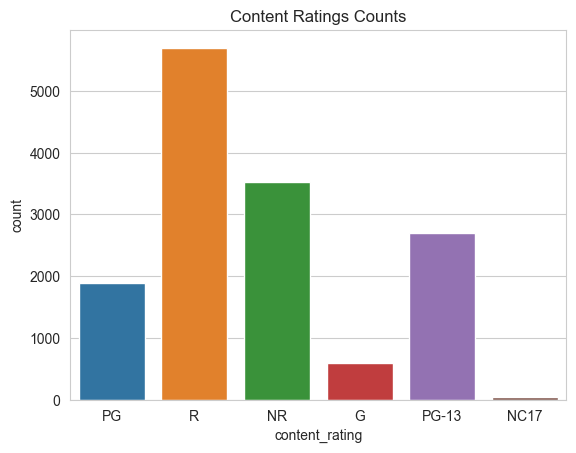

In [15]:
#Content Ratings Counts
print(df_movies['content_rating'].value_counts())
sns.countplot(data=df_movies, x='content_rating')
plt.title('Content Ratings Counts')

tomatometer_status
Rotten             6628
Fresh              5012
Certified-Fresh    2797
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Fresh, Certified Fresh and Rotten Movies')

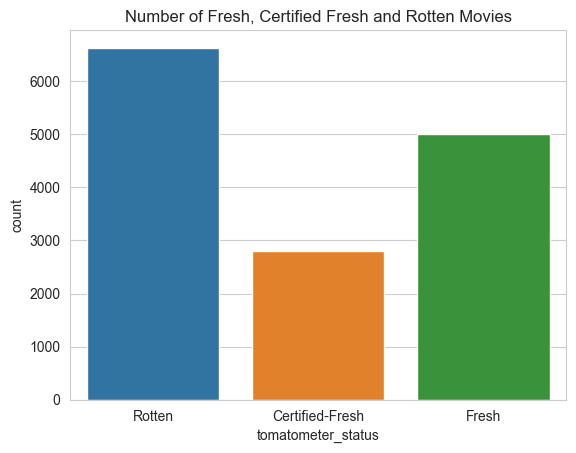

In [16]:
#Number od Fresh, Certified Fresh and Rotten Movies
print(df_movies['tomatometer_status'].value_counts())
sns.countplot(data=df_movies, x='tomatometer_status')
plt.title('Number of Fresh, Certified Fresh and Rotten Movies')

In [17]:
#Replacing tomatometer_status with numeric values
df_movies['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified-Fresh'], [0, 1, 2], inplace=True)

In [18]:
df_movies['tomatometer_status'].value_counts()

tomatometer_status
0    6628
1    5012
2    2797
Name: count, dtype: int64

audience_status
Upright    7679
Spilled    6758
Name: count, dtype: int64


Text(0.5, 1.0, 'Audience Status Counts')

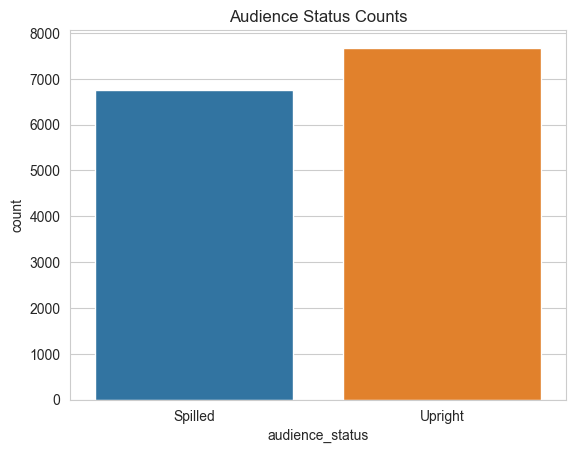

In [19]:
#Audience Status Counts
print(df_movies['audience_status'].value_counts())
sns.countplot(data=df_movies, x='audience_status')
plt.title('Audience Status Counts')

production_company
Warner Bros. Pictures               484
Paramount Pictures                  483
Universal Pictures                  462
20th Century Fox                    404
IFC Films                           357
Sony Pictures Home Entertainment    351
Warner Home Video                   341
MGM                                 264
MGM Home Entertainment              242
Sony Pictures Classics              231
Name: count, dtype: int64


Text(0.5, 1.0, 'Audience Status Counts')

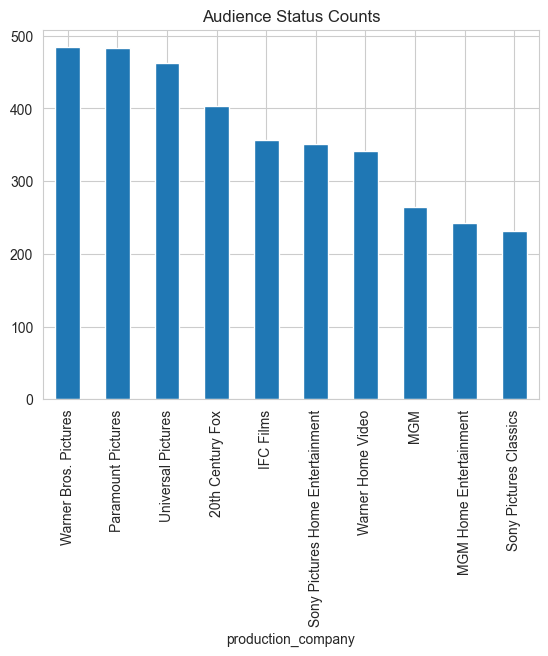

In [20]:
#Number of Movies Produced by top 10 Company
print(df_movies['production_company'].value_counts()[:10])
df_movies['production_company'].value_counts()[:10].plot(kind='bar')
plt.title('Audience Status Counts')

In [21]:
#Movies per Year
df_movies['original_release_date'] = pd.to_datetime(df_movies['original_release_date'])
df_movies['original_release_year'] = df_movies['original_release_date'].dt.year

C:\Users\amras\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Year with most number of movies:  2014
Year with least number of movies:  1914


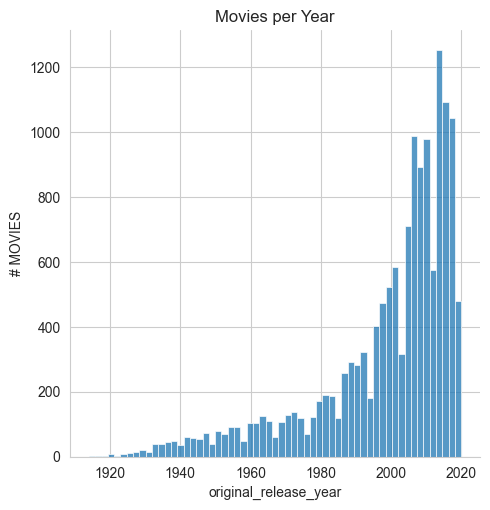

In [22]:
sns.displot(data=df_movies, x='original_release_year')
plt.ylabel('# MOVIES')
plt.title('Movies per Year')
print('Year with most number of movies: ', df_movies['original_release_year'].value_counts().index[0])
print('Year with least number of movies: ', df_movies['original_release_year'].value_counts().index[-1])

Text(0, 0.5, 'Counts')

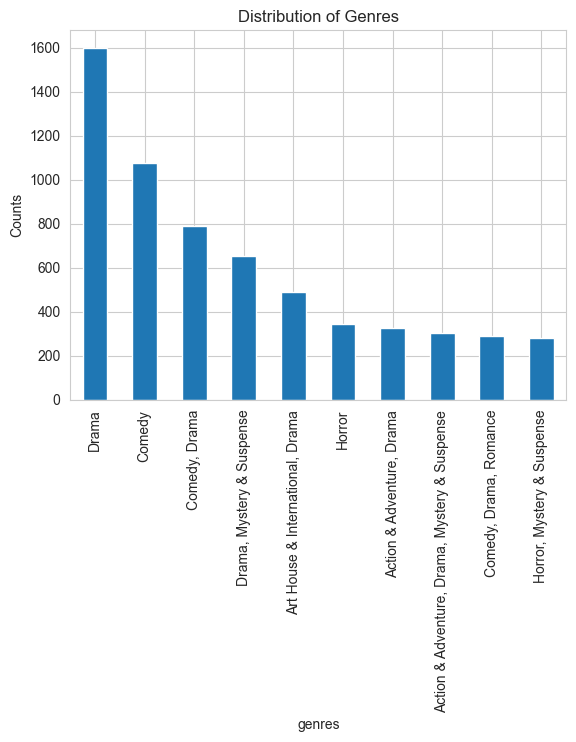

In [23]:
df_movies['genres'].value_counts()[:10].plot(kind='bar')
plt.title('Distribution of Genres')
plt.ylabel('Counts')

In [24]:
df_movies.describe()

,original_release_date,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors,num_authors,num_actors,original_release_year
count,14437,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000,1.443700e+04,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000
mean,1999-02-20 18:06:24.512017792,103.472328,0.734640,58.886264,62.011152,59.805084,1.693202e+05,15.885156,38.804184,23.220683,1.122532,1.834661,27.325829,1998.646256
min,1914-06-01 00:00:00,8.000000,0.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1914.000000
25%,1991-10-23 00:00:00,91.000000,0.000000,36.000000,14.000000,44.000000,1.117000e+03,4.000000,6.000000,4.000000,1.000000,1.000000,12.000000,1991.000000
50%,2006-03-10 00:00:00,100.000000,1.000000,63.000000,33.000000,62.000000,5.977000e+03,9.000000,18.000000,10.000000,1.000000,2.000000,22.000000,2006.000000
75%,2013-06-07 00:00:00,112.000000,1.000000,84.000000,87.000000,77.000000,3.608700e+04,26.000000,48.000000,28.000000,1.000000,2.000000,38.000000,2013.000000
max,2020-09-24 00:00:00,266.000000,2.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,22.000000,24.000000,306.000000,2020.000000
std,NaN,18.441317,0.763191,28.375145,69.537820,20.351129,1.916349e+06,15.628882,53.769773,31.389164,0.519116,1.167419,20.641183,19.996710


Correlation

<Axes: >

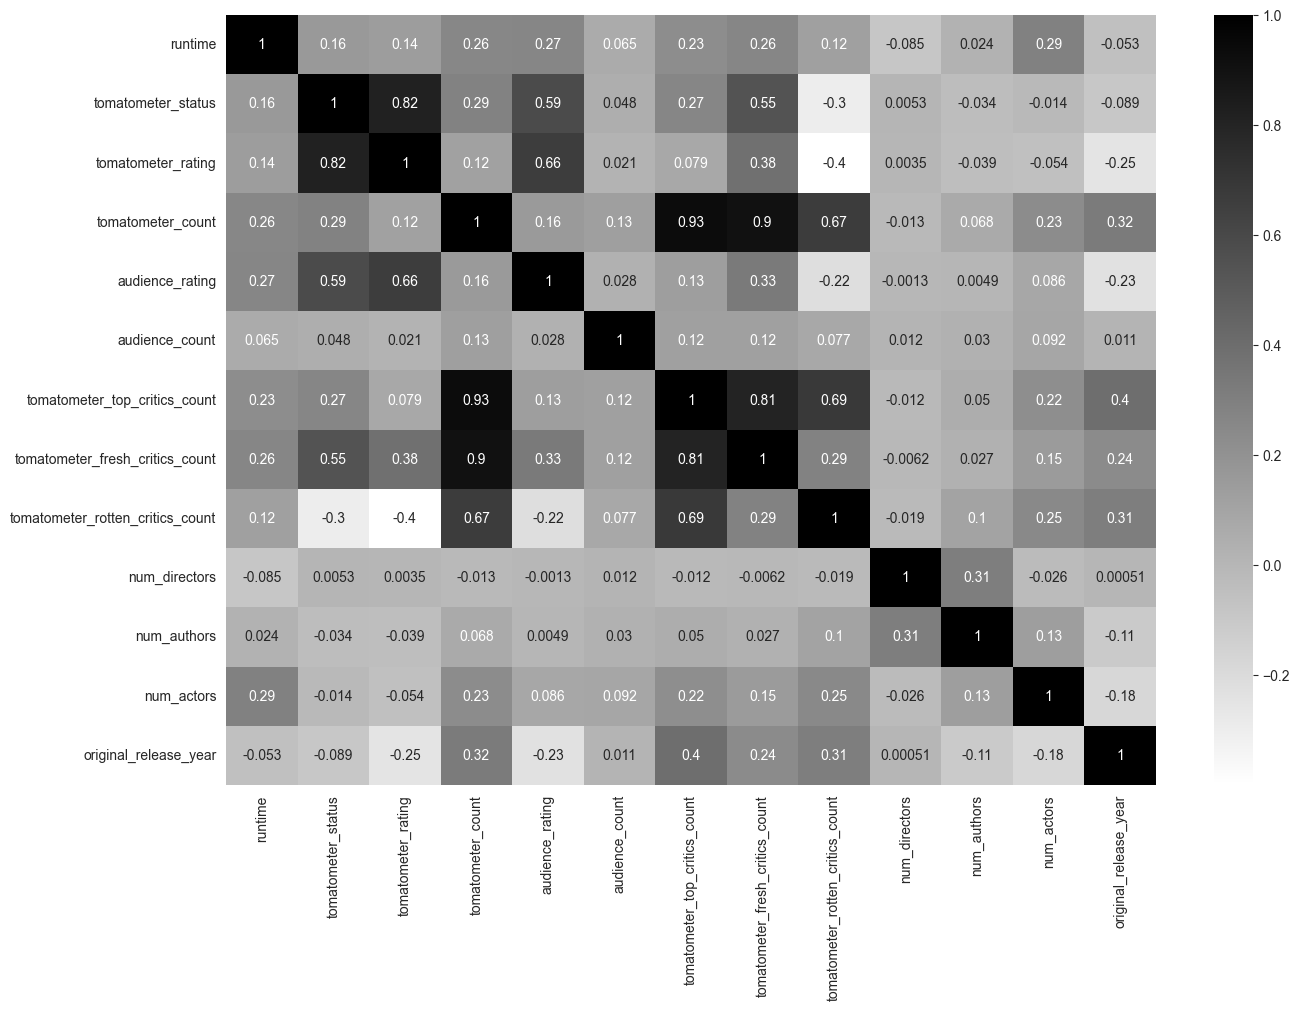

In [25]:
#Correlation
corr = df_movies.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='binary')

In [26]:
#Correlation with the target value 'tomatometer_status'
df_movies.select_dtypes('number').corr()['tomatometer_status'].sort_values(ascending=False)

tomatometer_status                  1.000000
tomatometer_rating                  0.816708
audience_rating                     0.587780
tomatometer_fresh_critics_count     0.545763
tomatometer_count                   0.287299
tomatometer_top_critics_count       0.265643
runtime                             0.162807
audience_count                      0.048062
num_directors                       0.005319
num_actors                         -0.014387
num_authors                        -0.033931
original_release_year              -0.089029
tomatometer_rotten_critics_count   -0.298060
Name: tomatometer_status, dtype: float64

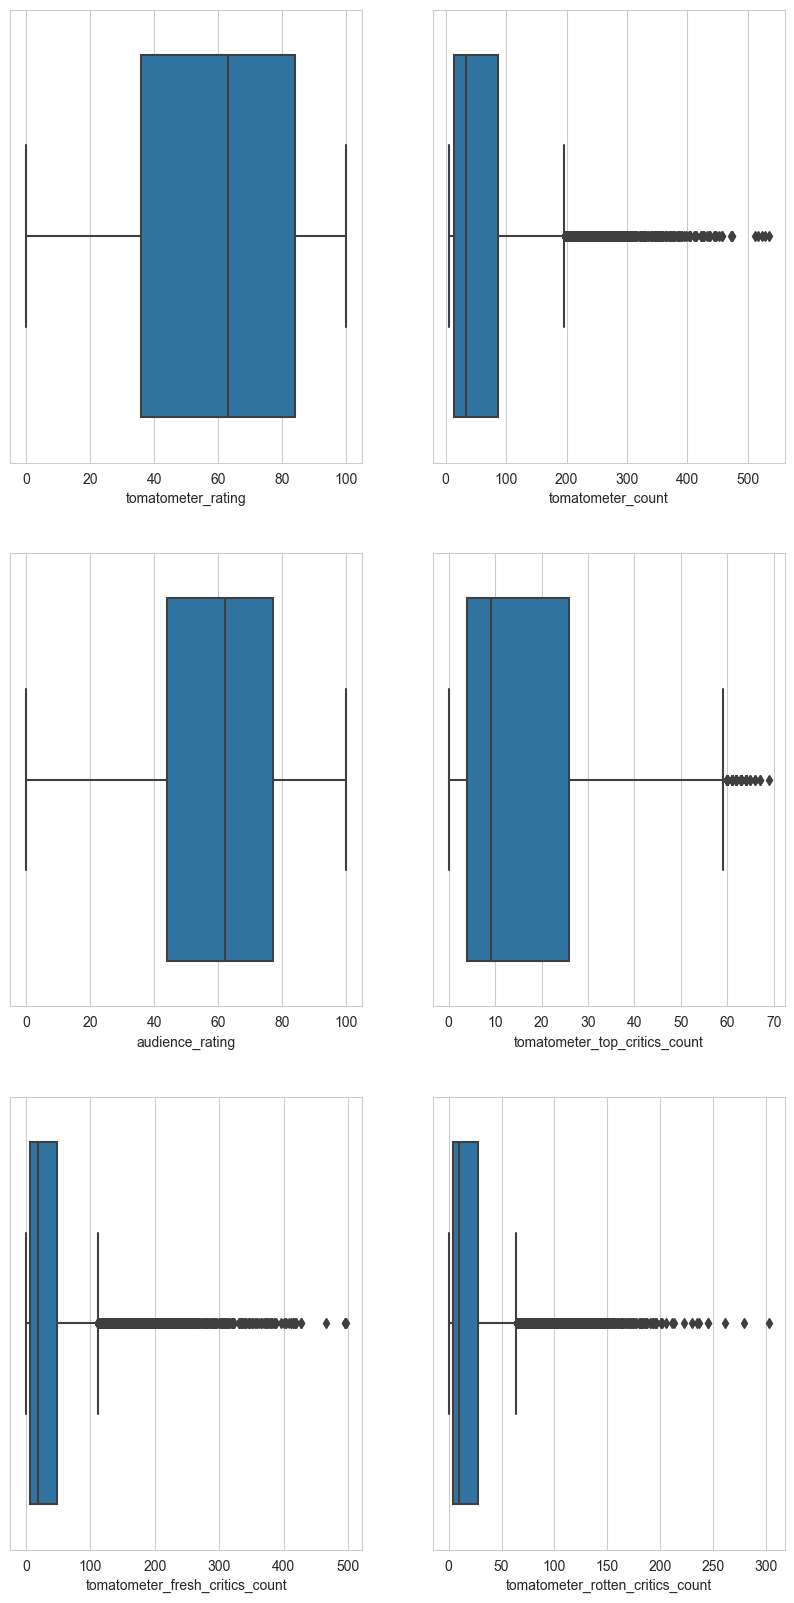

In [27]:
#Columns with high correlation
#Checking for OUTLIERS
box_col = ['tomatometer_rating', 'tomatometer_count', 'audience_rating', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
fig, ax = plt.subplots(3, 2, figsize=(10, 20))
ax = ax.flatten()
for index, value in enumerate(box_col):
    sns.boxplot(data=df_movies, x=value, ax=ax[index])

In [28]:
#Removing Outliers
mask1 = df_movies['tomatometer_count'] < iqr(df_movies['tomatometer_count']) * 1.5 + np.percentile(df_movies['tomatometer_count'], 75)
mask2 = df_movies['tomatometer_top_critics_count'] < iqr(df_movies['tomatometer_top_critics_count']) * 1.5 + np.percentile(df_movies['tomatometer_top_critics_count'], 75)
mask3 = df_movies['tomatometer_fresh_critics_count'] < iqr(df_movies['tomatometer_fresh_critics_count']) * 1.5 + np.percentile(df_movies['tomatometer_fresh_critics_count'], 75)
mask4 = df_movies['tomatometer_rotten_critics_count'] < iqr(df_movies['tomatometer_rotten_critics_count']) * 1.5 + np.percentile(df_movies['tomatometer_rotten_critics_count'], 75)

In [29]:
df_movies = df_movies[mask1 & mask2 & mask3 & mask4]

In [30]:
df_movies.shape

(11775, 25)

In [31]:
target = df_movies['tomatometer_status'].copy()
df_movies.drop('tomatometer_status', axis=1, inplace=True)

Dealing with skewed data

In [32]:
hist_col = df_movies.select_dtypes('number').columns
hist_col.shape

(12,)

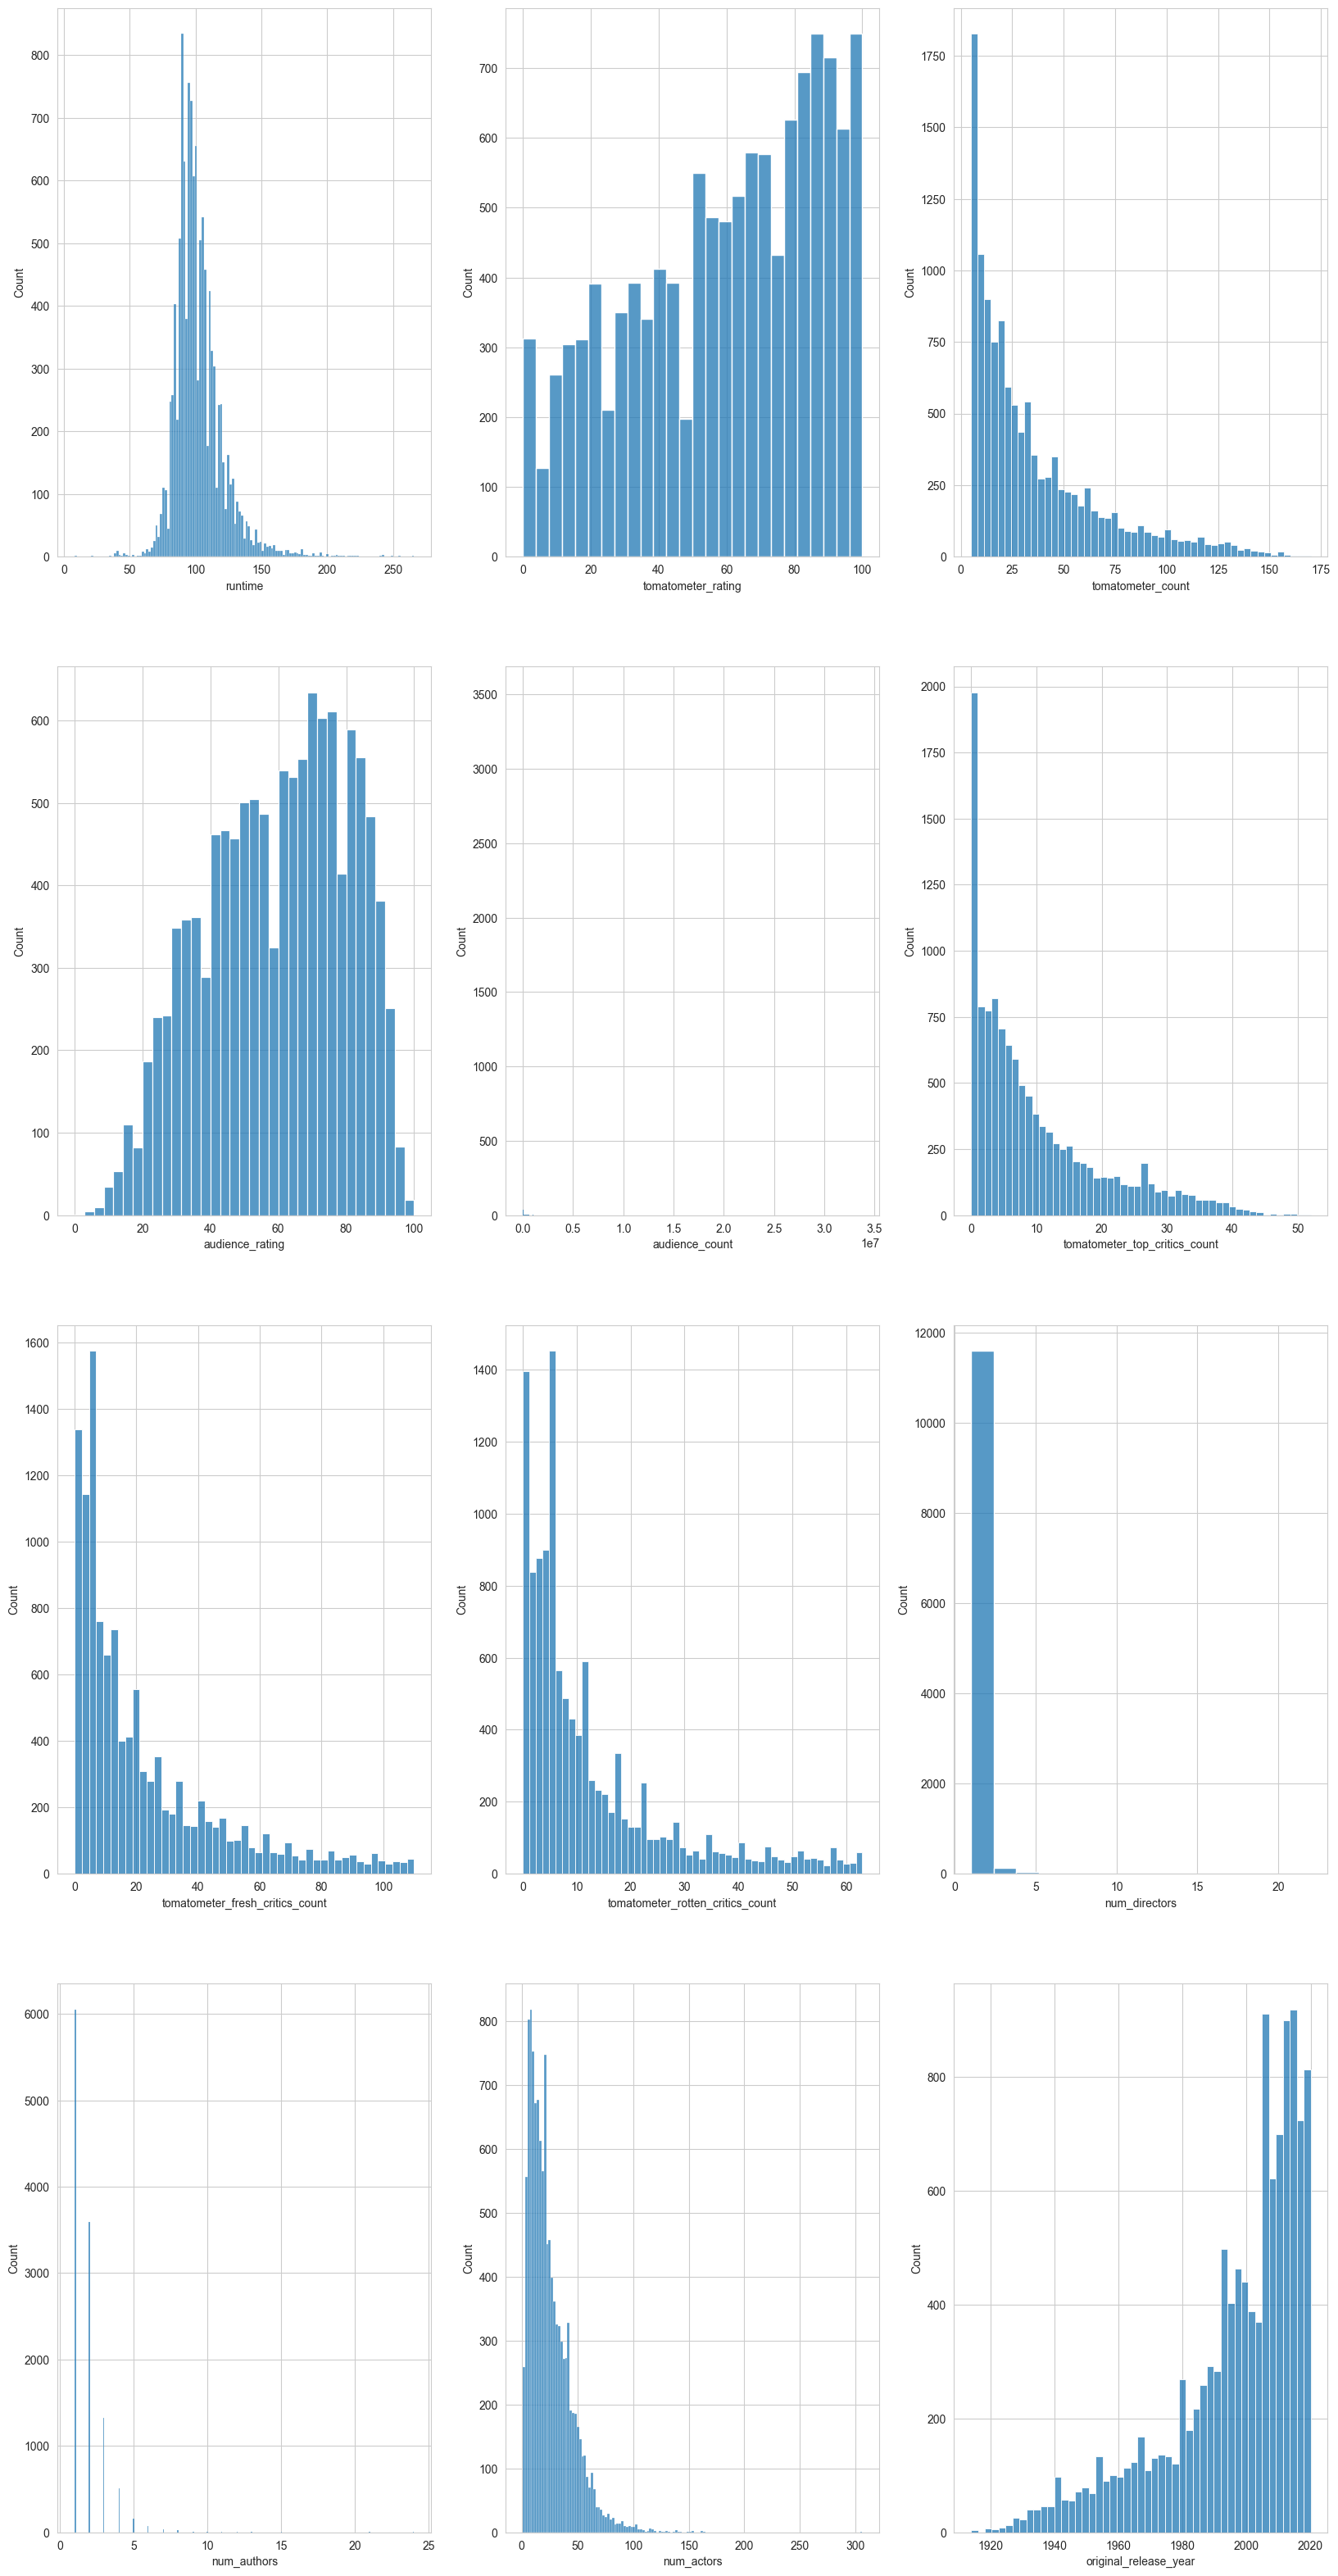

In [33]:
fig, ax = plt.subplots(4, 3, figsize=(20, 40))
ax = ax.flatten()
for index, value in enumerate(hist_col):
    sns.histplot(data=df_movies, x=value, ax=ax[index])

In [34]:
#Check Skewness
df_movies.skew(numeric_only=True)

runtime                              1.595251
tomatometer_rating                  -0.416737
tomatometer_count                    1.483559
audience_rating                     -0.279698
audience_count                      33.776311
tomatometer_top_critics_count        1.296750
tomatometer_fresh_critics_count      1.571695
tomatometer_rotten_critics_count     1.725348
num_directors                       12.464975
num_authors                          3.324130
num_actors                           1.804835
original_release_year               -1.243660
dtype: float64

In [35]:
#Data is considered skewed if skewness is >= 1 or <= -1
skewness_ckeck = (df_movies.skew(numeric_only=True) >= 1) | (df_movies.skew(numeric_only=True) <= -1)
skewed_columns = skewness_ckeck[skewness_ckeck == True].index
skewed_columns

Index(['runtime', 'tomatometer_count', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'num_directors', 'num_authors',
       'num_actors', 'original_release_year'],
      dtype='object')

In [36]:
np.seterr(divide = 'ignore')
sk_ = pd.DataFrame(np.select([df_movies[skewed_columns]==0, df_movies[skewed_columns] > 0, df_movies[skewed_columns] < 0], [0, np.log(df_movies[skewed_columns]), np.log(df_movies[skewed_columns])]),columns=skewed_columns).set_index(df_movies.index)
df_skew = df_movies.drop(columns=skewed_columns).set_index(df_movies.index)
df_movies_skew = pd.concat([df_skew,sk_],axis=1)
df_movies_skew = df_movies_skew[df_movies.columns.tolist()]
df_movies_skew

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors,num_authors,num_actors,original_release_year
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,Spilled,53.0,9.594514,0.693147,2.772589,2.079442,0.000000,0.000000,3.828641,7.590347
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,Upright,97.0,11.565385,1.791759,3.988984,0.000000,0.000000,0.000000,2.772589,7.579168
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,Upright,74.0,11.140673,1.609438,3.178054,1.098612,0.000000,0.000000,2.772589,7.577634
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,2017-01-12,...,Upright,86.0,10.081215,2.079442,3.891820,0.693147,0.000000,1.386294,2.639057,7.567863
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,2012-04-16,...,Upright,79.0,9.131622,1.791759,3.295837,0.000000,0.000000,0.000000,2.639057,7.579168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17702,m/zoo_2018,Zoo,A 12-year old boy and his misfit friends enlis...,PG,"Action & Adventure, Kids & Family",Colin McIvor,Colin McIvor,"Art Parkinson, Penelope Wilton, Amy Huberman, ...",2018-06-08,2018-06-10,...,Upright,62.0,4.852030,1.098612,2.708050,0.693147,0.000000,0.000000,1.386294,7.609862
17704,m/zoolander,Zoolander,Propelled to the top of the fashion world by a...,PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller","Ben Stiller, Owen Wilson, Will Ferrell, Christ...",2001-09-28,2013-08-01,...,Upright,80.0,13.758729,3.496508,4.477337,3.912023,0.000000,1.098612,4.634729,7.601402
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2016-04-19,...,Upright,74.0,7.085901,0.693147,1.609438,1.386294,0.000000,0.000000,3.912023,7.591357
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,...,Upright,91.0,10.315365,1.791759,3.091042,0.000000,0.693147,0.693147,3.496508,7.582738


In [37]:
#Encoding content_rating column
content_rating = pd.get_dummies(df_movies_skew['content_rating']).astype(int)
content_rating

,G,NC17,NR,PG,PG-13,R
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
...,...,...,...,...,...,...
17702,0,0,0,1,0,0
17704,0,0,0,0,1,0
17707,0,0,0,0,0,1
17710,0,0,0,1,0,0


In [38]:
#Replacing audience_status with numeric values
df_movies_skew['audience_status'].replace(['Spilled', 'Upright'], [0, 1], inplace=True)

In [39]:
df_movies_skew

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors,num_authors,num_actors,original_release_year
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,0,53.0,9.594514,0.693147,2.772589,2.079442,0.000000,0.000000,3.828641,7.590347
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,1,97.0,11.565385,1.791759,3.988984,0.000000,0.000000,0.000000,2.772589,7.579168
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,1,74.0,11.140673,1.609438,3.178054,1.098612,0.000000,0.000000,2.772589,7.577634
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,2017-01-12,...,1,86.0,10.081215,2.079442,3.891820,0.693147,0.000000,1.386294,2.639057,7.567863
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,2012-04-16,...,1,79.0,9.131622,1.791759,3.295837,0.000000,0.000000,0.000000,2.639057,7.579168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17702,m/zoo_2018,Zoo,A 12-year old boy and his misfit friends enlis...,PG,"Action & Adventure, Kids & Family",Colin McIvor,Colin McIvor,"Art Parkinson, Penelope Wilton, Amy Huberman, ...",2018-06-08,2018-06-10,...,1,62.0,4.852030,1.098612,2.708050,0.693147,0.000000,0.000000,1.386294,7.609862
17704,m/zoolander,Zoolander,Propelled to the top of the fashion world by a...,PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller","Ben Stiller, Owen Wilson, Will Ferrell, Christ...",2001-09-28,2013-08-01,...,1,80.0,13.758729,3.496508,4.477337,3.912023,0.000000,1.098612,4.634729,7.601402
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2016-04-19,...,1,74.0,7.085901,0.693147,1.609438,1.386294,0.000000,0.000000,3.912023,7.591357
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,...,1,91.0,10.315365,1.791759,3.091042,0.000000,0.693147,0.693147,3.496508,7.582738


In [40]:
df_movies_skew.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info', 'content_rating',
       'genres', 'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'num_directors', 'num_authors', 'num_actors', 'original_release_year'],
      dtype='object')

In [41]:
df_feature = pd.concat([df_movies_skew[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'num_directors', 'num_authors', 'num_actors']], content_rating], axis=1)

In [42]:
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors,num_authors,num_actors,G,NC17,NR,PG,PG-13,R
2,4.804021,67.0,3.178054,0,53.0,9.594514,0.693147,2.772589,2.079442,0.0,0.000000,3.828641,0,0,0,0,0,1
3,4.553877,100.0,3.988984,1,97.0,11.565385,1.791759,3.988984,0.000000,0.0,0.000000,2.772589,0,0,1,0,0,0
4,4.844187,89.0,3.295837,1,74.0,11.140673,1.609438,3.178054,1.098612,0.0,0.000000,2.772589,1,0,0,0,0,0
6,4.382027,96.0,3.931826,1,86.0,10.081215,2.079442,3.891820,0.693147,0.0,1.386294,2.639057,0,0,1,0,0,0
7,4.521789,96.0,3.332205,1,79.0,9.131622,1.791759,3.295837,0.000000,0.0,0.000000,2.639057,0,0,1,0,0,0


Scaling the Data

In [43]:
scaler = StandardScaler()
df_feature_scale = scaler.fit_transform(df_feature)
df_feature_scale

array([[ 1.13660688,  0.25969191, -0.00366466, ..., -0.39396009,
        -0.3943915 ,  1.26215735],
       [-0.33061892,  1.43583775,  0.90048811, ..., -0.39396009,
        -0.3943915 , -0.79229424],
       [ 1.37220165,  1.04378913,  0.12765843, ..., -0.39396009,
        -0.3943915 , -0.79229424],
       ...,
       [ 0.2002929 , -0.1323567 , -1.09724764, ..., -0.39396009,
        -0.3943915 ,  1.26215735],
       [ 1.73051279,  1.29327461, -0.05111682, ...,  2.53832819,
        -0.3943915 , -0.79229424],
       [ 1.08833072, -0.3462014 , -1.22857072, ...,  2.53832819,
        -0.3943915 , -0.79229424]])

Splitting the data into train set and test set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_scale, target, test_size=0.2, random_state=42)

In [45]:
print(f'Size of train data: {X_train.shape[0]}\nSize of test data: {X_test.shape[0]}')

Size of train data: 9420
Size of test data: 2355


Decision Tree Model

In [46]:
#i will try default params
tree = DecisionTreeClassifier(random_state=2)

In [47]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

[Text(0.2800245098039216, 0.9736842105263158, 'x[1] <= -0.008\ngini = 0.615\nsamples = 9420\nvalue = [4195, 3825, 1400]'),
 Text(0.26433823529411765, 0.9210526315789473, 'gini = 0.0\nsamples = 4195\nvalue = [4195, 0, 0]'),
 Text(0.2957107843137255, 0.9210526315789473, 'x[2] <= 0.552\ngini = 0.392\nsamples = 5225\nvalue = [0, 3825, 1400]'),
 Text(0.06274509803921569, 0.868421052631579, 'x[6] <= 0.956\ngini = 0.001\nsamples = 3251\nvalue = [0, 3249, 2]'),
 Text(0.03137254901960784, 0.8157894736842105, 'x[6] <= 0.577\ngini = 0.001\nsamples = 3227\nvalue = [0, 3226, 1]'),
 Text(0.01568627450980392, 0.7631578947368421, 'gini = 0.0\nsamples = 2973\nvalue = [0, 2973, 0]'),
 Text(0.047058823529411764, 0.7631578947368421, 'x[5] <= -0.189\ngini = 0.008\nsamples = 254\nvalue = [0, 253, 1]'),
 Text(0.03137254901960784, 0.7105263157894737, 'gini = 0.0\nsamples = 190\nvalue = [0, 190, 0]'),
 Text(0.06274509803921569, 0.7105263157894737, 'x[5] <= -0.188\ngini = 0.031\nsamples = 64\nvalue = [0, 63, 1]

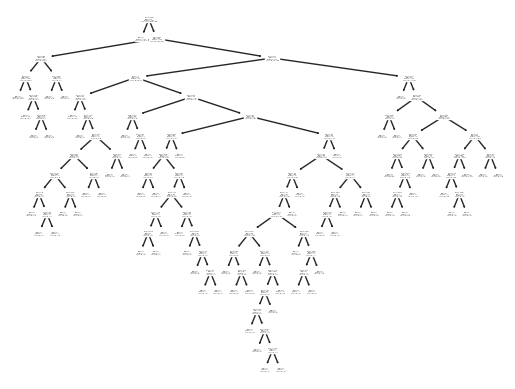

In [48]:
plot_tree(tree)

In [49]:
y_predict = tree.predict(X_test)

In [50]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9893842887473461
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      0.99      0.99       960
           2       0.97      0.96      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.98      2355
weighted avg       0.99      0.99      0.99      2355


[[1027    0    0]
 [   0  950   10]
 [   0   15  353]]


Text(50.722222222222214, 0.5, 'ACTUAL')

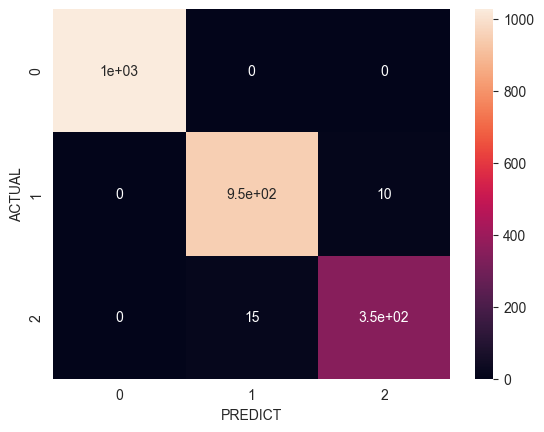

In [51]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

Random Forest Model

In [52]:
#Using default parameters
random_forest = RandomForestClassifier(random_state=2)

In [53]:
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

In [54]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9915074309978769
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      1.00      0.99       960
           2       0.99      0.96      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.99      2355
weighted avg       0.99      0.99      0.99      2355


[[1027    0    0]
 [   0  956    4]
 [   0   16  352]]


Text(50.722222222222214, 0.5, 'ACTUAL')

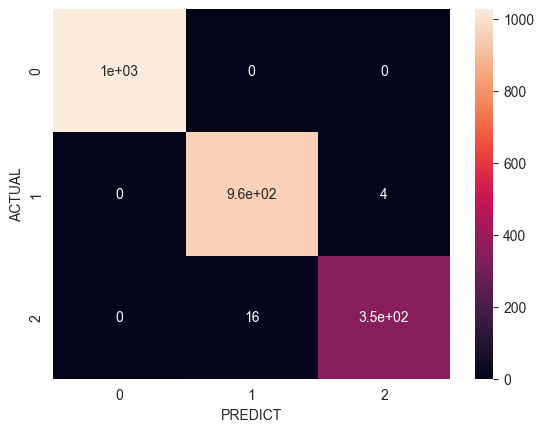

In [55]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

fruntime: 0.004397083296385907
ftomatometer_rating: 0.522064962068805
ftomatometer_count: 0.09693235316368588
faudience_status: 0.02707797816073271
faudience_rating: 0.04350468565600802
faudience_count: 0.010889519154471717
ftomatometer_top_critics_count: 0.027229304062177596
ftomatometer_fresh_critics_count: 0.1330198409391083
ftomatometer_rotten_critics_count: 0.1160274015503831
fnum_directors: 0.0006325369978027552
fnum_authors: 0.0014807276827121124
fnum_actors: 0.004527988318280005
fG: 0.00026691397614902297
fNC17: 2.1950577772793267e-05
fNR: 0.00798304330163969
fPG: 0.0004690805392571374
fPG-13: 0.0013487979856973468
fR: 0.0021258325689310245


([<matplotlib.axis.YTick at 0x1d681971750>,
 [Text(0, 0, 'runtime'),
  Text(0, 1, 'tomatometer_rating'),
  Text(0, 2, 'tomatometer_count'),
  Text(0, 3, 'audience_status'),
  Text(0, 4, 'audience_rating'),
  Text(0, 5, 'audience_count'),
  Text(0, 6, 'tomatometer_top_critics_count'),
  Text(0, 7, 'tomatometer_fresh_critics_count'),
  Text(0, 8, 'tomatometer_rotten_critics_count'),
  Text(0, 9, 'num_directors'),
  Text(0, 10, 'num_authors'),
  Text(0, 11, 'num_actors'),
  Text(0, 12, 'G'),
  Text(0, 13, 'NC17'),
  Text(0, 14, 'NR'),
  Text(0, 15, 'PG'),
  Text(0, 16, 'PG-13'),
  Text(0, 17, 'R')])

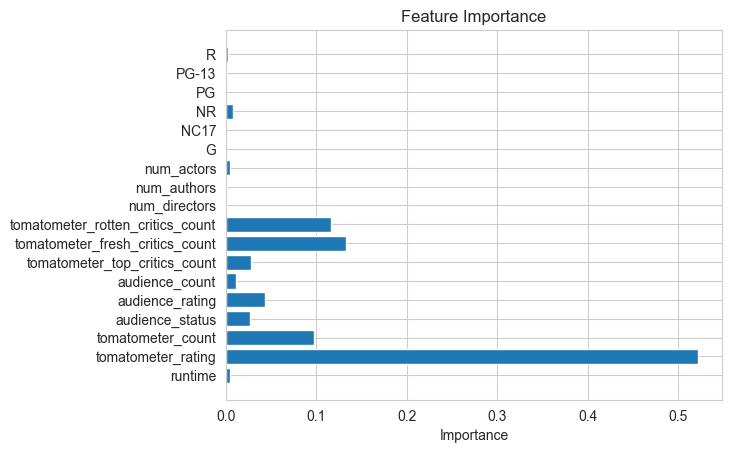

In [56]:
feature_importances = random_forest.feature_importances_
for index, feature in enumerate(df_feature.columns):
    print(f'f{feature}: {feature_importances[index]}')

plt.barh(np.arange(len(feature_importances)), feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.yticks(np.arange(len(feature_importances)), df_feature.columns)

Feature Selection

In [57]:
scaler = StandardScaler()
df_feature_scale = scaler.fit_transform(df_feature.drop(['R', 'PG-13', 'PG', 'NR', 'NC17', 'G', 'num_actors', 'num_authors', 'num_directors', 'runtime'], axis=1))
df_feature_scale

array([[ 0.25969191, -0.00366466, -1.06322646, ..., -0.99834516,
         0.22228994,  0.10197493],
       [ 1.43583775,  0.90048811,  0.9405334 , ..., -0.00843641,
         1.22130938, -1.73058151],
       [ 1.04378913,  0.12765843,  0.9405334 , ..., -0.17271794,
         0.55529642, -0.76240376],
       ...,
       [-0.1323567 , -1.09724764,  0.9405334 , ..., -0.99834516,
        -0.73300005, -0.50887721],
       [ 1.29327461, -0.05111682,  0.9405334 , ..., -0.00843641,
         0.48383441, -1.73058151],
       [-0.3462014 , -1.22857072,  0.9405334 , ..., -1.62290804,
        -0.91626674, -0.50887721]])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_scale, target, test_size=0.2, random_state=42)
print(f'Size of train data: {X_train.shape[0]}\nSize of test data: {X_test.shape[0]}')

Size of train data: 9420
Size of test data: 2355


In [59]:
random_forest = RandomForestClassifier(random_state=2)

In [60]:
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

In [61]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9898089171974522
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      0.99      0.99       960
           2       0.98      0.95      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.98      2355
weighted avg       0.99      0.99      0.99      2355


[[1027    0    0]
 [   0  954    6]
 [   0   18  350]]


Text(50.722222222222214, 0.5, 'ACTUAL')

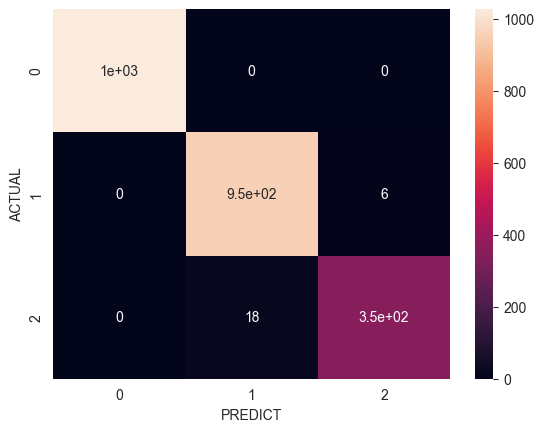

In [62]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

In [63]:
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(target), y=target.values)
class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7516277288395251, 1: 0.8202716823406478, 2: 2.2200226244343892}

In [64]:
random_forest_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

In [65]:
random_forest_weighted.fit(X_train, y_train)
y_predict = random_forest_weighted.predict(X_test)

In [66]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9906581740976645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      0.99      0.99       960
           2       0.98      0.96      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.99      2355
weighted avg       0.99      0.99      0.99      2355


[[1027    0    0]
 [   0  954    6]
 [   0   16  352]]


Text(50.722222222222214, 0.5, 'ACTUAL')

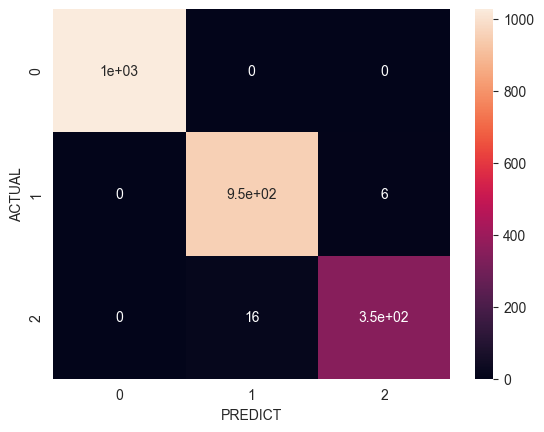

In [67]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

XGBoost Model

In [68]:
clf = XGBClassifier(max_depth=5,
                    objective='multi:softprob',
                    n_estimators=1000, 
                        num_classes=3
                    )

In [69]:
clf.fit(X_train, y_train)  
y_predict = clf.predict(X_test)

[16:50:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_classes" } are not used.


In [70]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9915074309978769
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.99      0.99      0.99       960
           2       0.98      0.96      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.99      0.99      2355
weighted avg       0.99      0.99      0.99      2355


[[1027    0    0]
 [   0  954    6]
 [   0   14  354]]


Text(50.722222222222214, 0.5, 'ACTUAL')

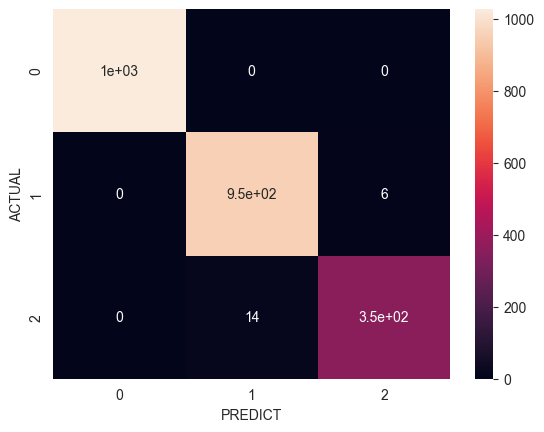

In [71]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')